# Hierarchical Clustering

## Library 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## dataset 읽어오기

In [4]:
df = pd.read_csv('../data/Mall_Customers.csv')

In [5]:
X = df.loc[ : , 'Annual Income (k$)' : ]

In [6]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Dendrogram 을 그리고, 최적의 클러스터 갯수를 찾아보자.

In [7]:
import scipy.cluster.hierarchy as sch

In [10]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


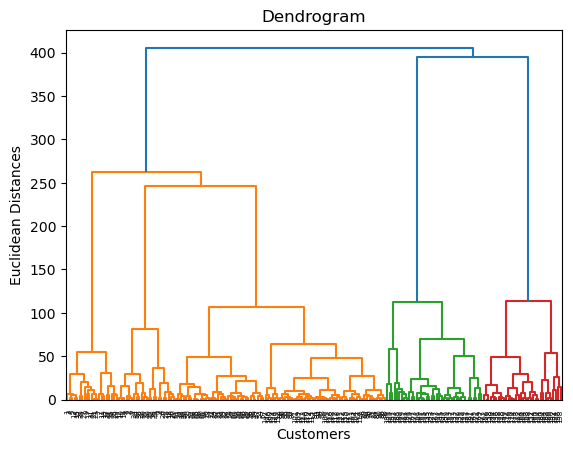

In [12]:
sch.dendrogram( sch.linkage(X, method = 'ward')  )
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

## Training the Hierarchical Clustering model

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters= 5)

In [16]:
y_pred = hc.fit_predict(X)

In [18]:
df['Group'] = y_pred

In [19]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


## 그루핑 정보를 확인

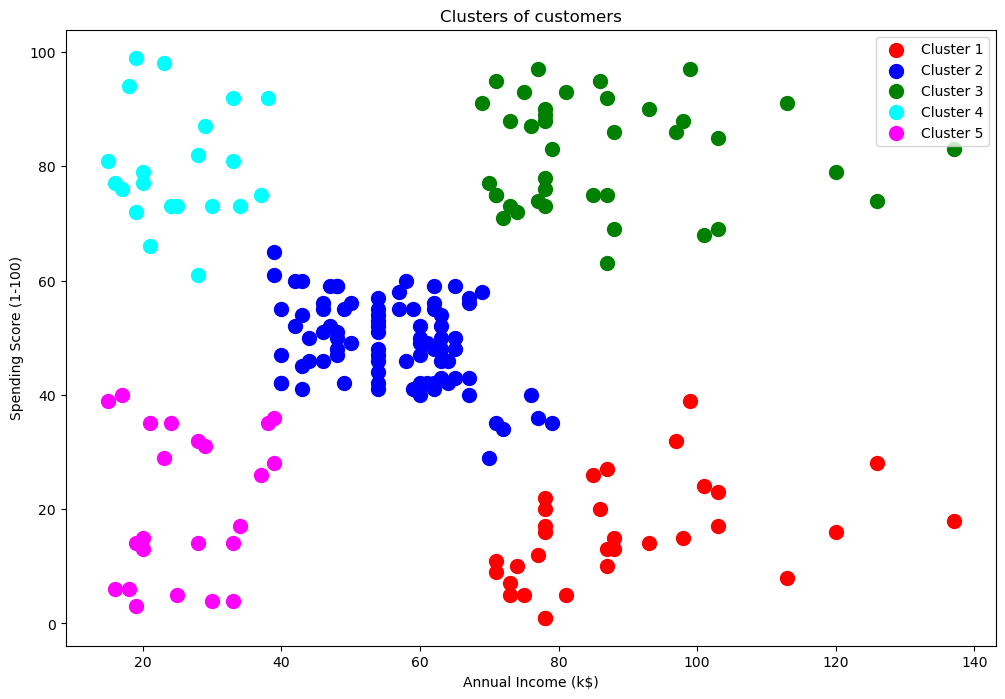

In [22]:
plt.figure(figsize=[12,8])
plt.scatter(X.values[y_pred == 0, 0], X.values[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.values[y_pred == 1, 0], X.values[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.values[y_pred == 2, 0], X.values[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.values[y_pred == 3, 0], X.values[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.values[y_pred == 4, 0], X.values[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 그룹 정보를 데이터셋에 추가

## 마케팅 이메일을 보내기 위해, 3번 그룹의 고객들만 가져와보자. 

In [27]:
df.loc[ df['Group'] == 3 , ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


In [23]:
# 각 그룹별 수입과 소비지표의 평균을 구하세요.

In [29]:
pd.pivot_table(df, index='Group', aggfunc= np.mean)

,Age,Annual Income (k$),CustomerID,Spending Score (1-100)
Group,,,,
0,41.000000,89.406250,166.250000,15.593750
1,42.482353,55.811765,87.894118,49.129412
2,32.692308,86.538462,162.000000,82.128205
3,25.333333,25.095238,22.000000,80.047619
4,45.217391,26.304348,23.000000,20.913043
